# Exploratory Data Analysis

**Imports**

In [1]:
import matplotlib.pyplot as plt
from helper import load_dataset, get_text_len, plot_word_cloud, get_top_ngram

[nltk_data] Downloading package stopwords to /home/duke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/duke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/duke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_dataset = load_dataset('../dataset/training.json', test=True)
val_dataset = load_dataset('../dataset/validation_data.json', test=False)
test_dataset = load_dataset('../dataset/test_data.json', test=False)

train_dataset['word_count'] = train_dataset.apply(get_text_len, axis=1)
val_dataset['word_count'] = val_dataset.apply(get_text_len, axis=1)
test_dataset['word_count'] = test_dataset.apply(get_text_len, axis=1)

**Dataframe Head**

In [3]:
train_dataset.head()

,text,label,word_count
id,,,
0,Have you ever heard of the Crusades? A time in...,1,38
1,"The professors, who likely have nearly a decad...",1,31
2,Kemba Walker does a good job of defending Foye...,1,22
3,"Ganias' lawyer, Stanley Twardy, urged the gove...",1,13
4,The Circuit Court of Appeals of New Jersey had...,0,50


In [4]:
train_dataset.iloc[4]['text']

'The Circuit Court of Appeals of New Jersey had jurisdiction of the controversy between these parties, and its decree was affirmed. But as the court had jurisdiction under the original act of Congress, the jurisdiction in this case was also, under the act of Congress, a bar to the suit.'

**Sample AI text**

In [5]:
train_dataset.iloc[0].text

'Have you ever heard of the Crusades? A time in which Christians went on a 200 year rampage throughout Europe and on their path to Isreal in which they slaughtered innocent people in the name of your God?'

**Sample Human text**

In [6]:
train_dataset.iloc[4].text

'The Circuit Court of Appeals of New Jersey had jurisdiction of the controversy between these parties, and its decree was affirmed. But as the court had jurisdiction under the original act of Congress, the jurisdiction in this case was also, under the act of Congress, a bar to the suit.'

**Dataset label distribution**

In [7]:
print('AI text')
print(train_dataset[train_dataset['label'] == 0].count())

print('\nHuman text')
print(train_dataset[train_dataset['label'] == 1].count())

AI text
text          9000
label         9000
word_count    9000
dtype: int64

Human text
text          9000
label         9000
word_count    9000
dtype: int64


## Word count - Train dataset

In [8]:
train_dataset['word_count'].describe()

count    18000.000000
mean        34.771833
std         27.176340
min          1.000000
25%         17.000000
50%         26.000000
75%         42.000000
max        193.000000
Name: word_count, dtype: float64

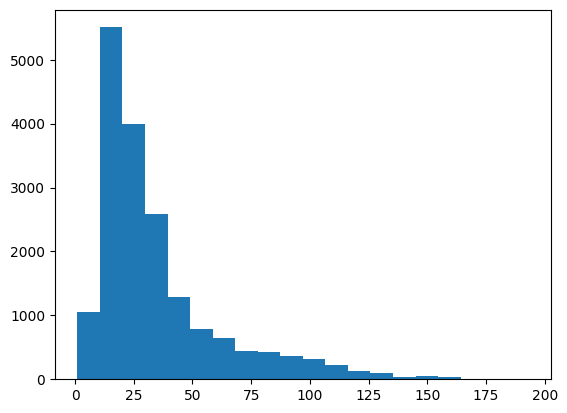

In [9]:
plt.hist(train_dataset['word_count'], bins = 20)
plt.show()

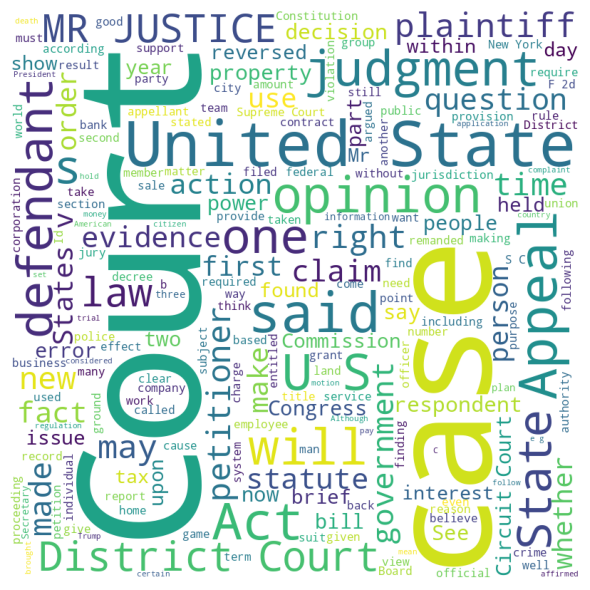

In [10]:
plot_word_cloud(train_dataset)

## Word count - Val dataset

In [11]:
val_dataset['word_count'].describe()

count    2000.000000
mean       34.410500
std        26.701282
min         1.000000
25%        16.000000
50%        26.000000
75%        42.000000
max       182.000000
Name: word_count, dtype: float64

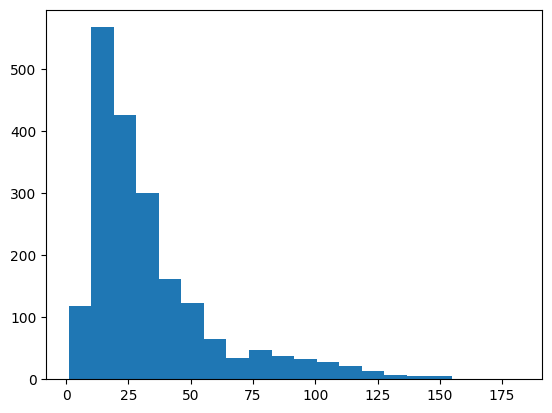

In [12]:
plt.hist(val_dataset['word_count'], bins = 20)
plt.show()

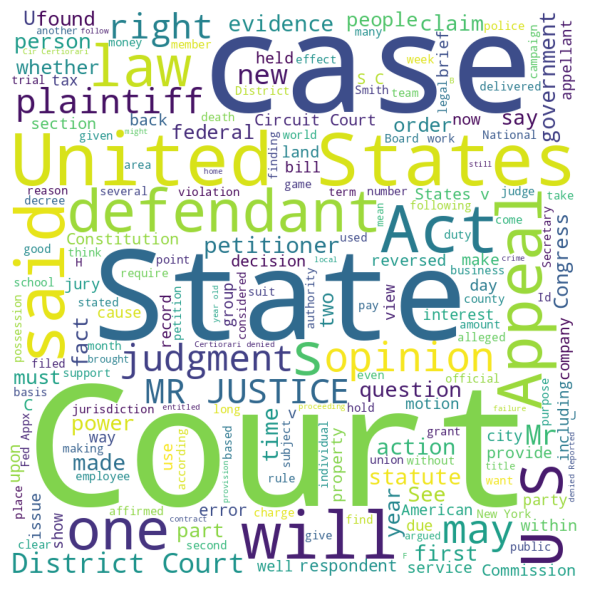

In [13]:
plot_word_cloud(val_dataset)

## Word count - Test dataset

In [14]:
test_dataset['word_count'].describe()

count    2000.000000
mean       35.346500
std        27.893287
min         1.000000
25%        17.000000
50%        26.000000
75%        42.000000
max       172.000000
Name: word_count, dtype: float64

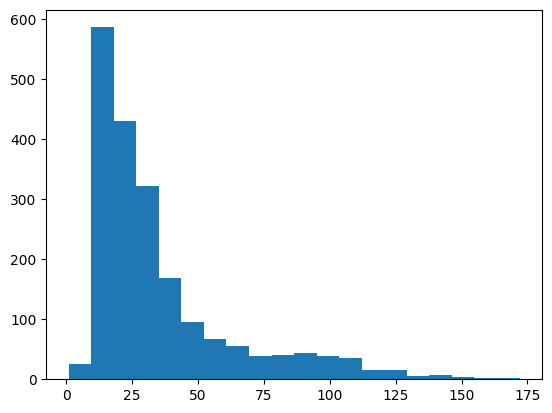

In [15]:
plt.hist(test_dataset['word_count'], bins = 20)
plt.show()

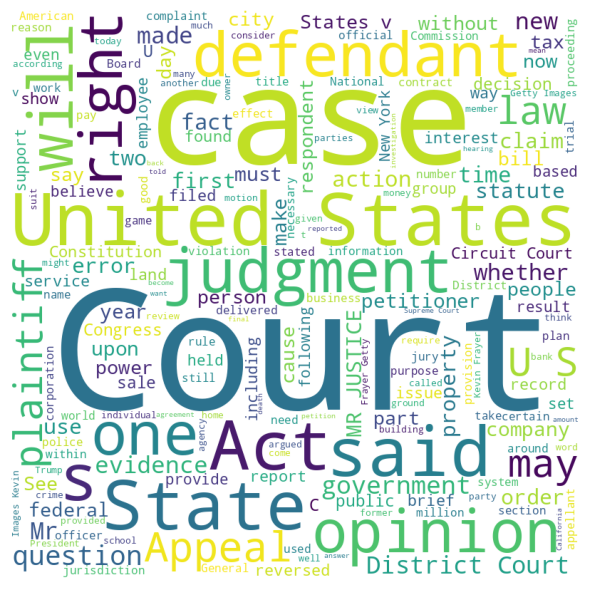

In [16]:
plot_word_cloud(test_dataset)

In [17]:
top_ngram_set = set()
for df in [train_dataset, val_dataset, test_dataset]:
    top_ngram_set = top_ngram_set.union(set(get_top_ngram(df['text'], (3,4), 10)))
    
top_ngram_set

{'court of appeals',
 'of the court',
 'of the united',
 'of the united states',
 'opinion of the',
 'opinion of the court',
 'the court of',
 'the court of appeals',
 'the district court',
 'the opinion of',
 'the opinion of the',
 'the united states'}